Text(0.5, 1.0, 'Detected lines')

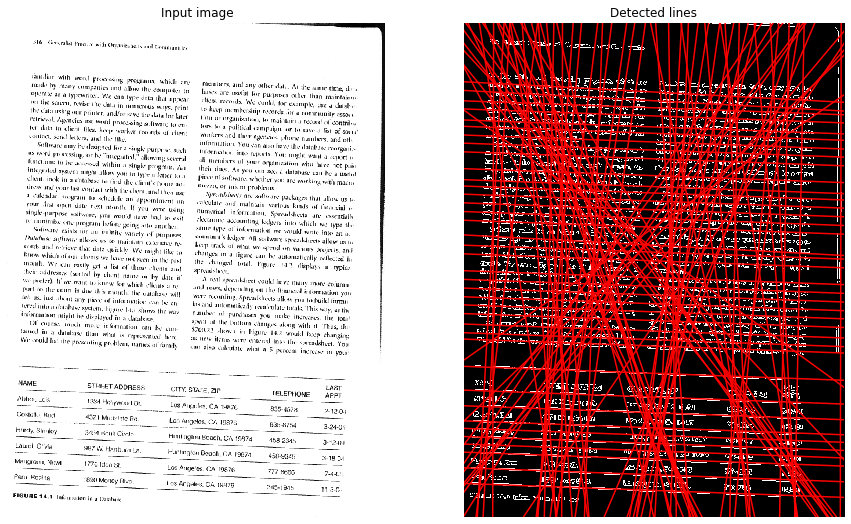

In [1]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy.stats import mode

image = rgb2gray(imread("resources/doc.png"))

edges = canny(image)
# Classic straight-line Hough transform
tested_angles = np.deg2rad(np.arange(0.1, 180.0))
h, theta, d = hough_line(edges, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 2, figsize=(15, 16))
ax = axes.ravel()

ax[0].imshow(image, cmap="gray")
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges, cmap="gray")
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
    
ax[1].set_xlim(origin)
ax[1].set_ylim((edges.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

[2.24620502]


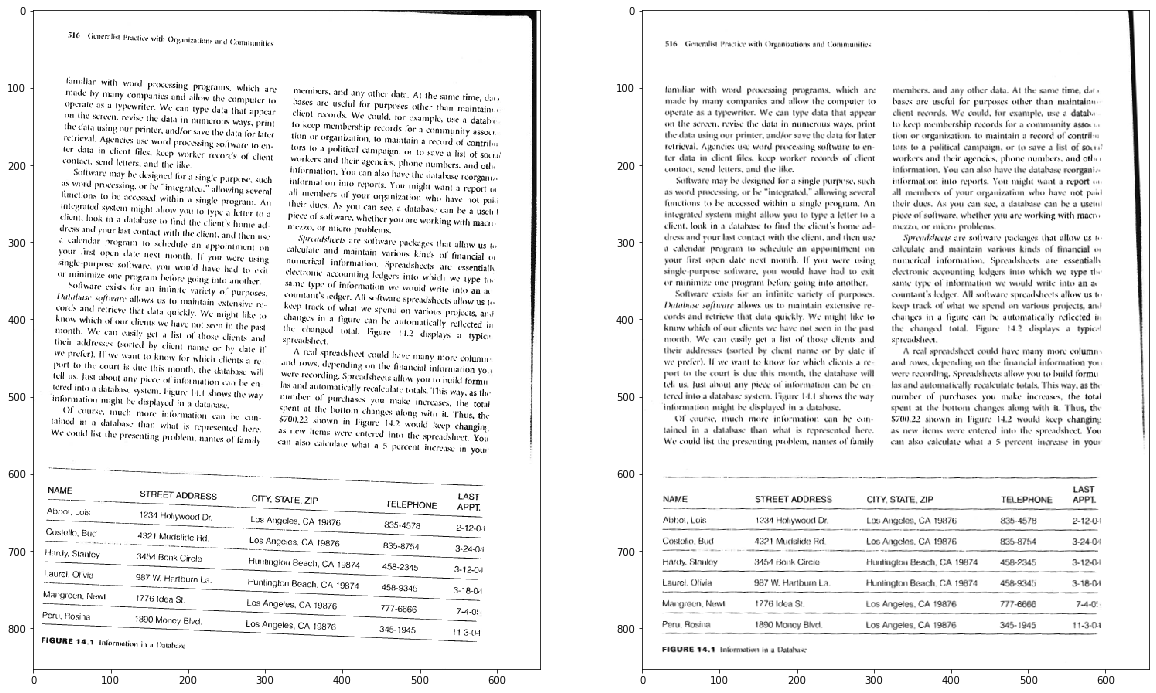

In [2]:
def skew_angle_hough_transform(image):
    # convert to edges
    edges = canny(image)
    # Classic straight-line Hough transform between 0.1 - 180 degrees.
    tested_angles = np.deg2rad(np.arange(0.1, 180.0))
    h, theta, d = hough_line(edges, theta=tested_angles)
    
    # find line peaks and angles
    accum, angles, dists = hough_line_peaks(h, theta, d)
    
    # round the angles to 2 decimal places and find the most common angle.
    most_common_angle = mode(np.around(angles, decimals=2))[0]
    
    # convert the angle to degree for rotation.
    skew_angle = np.rad2deg(most_common_angle - np.pi/2)
    print(skew_angle)
    return skew_angle
    
fig, ax = plt.subplots(ncols=2, figsize=(20,20))
ax[0].imshow(image, cmap="gray")
ax[1].imshow(rotate(image, skew_angle_hough_transform(image), cval=1), cmap="gray")
plt.show()